<a href="https://colab.research.google.com/github/jonas-richter/tara_guidi2016_data/blob/data_exploration/Eukaryote_abundance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eukaryotes count per sample

In [485]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
sns.set()
## ML
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [486]:
# read data
euk_norm = pd.read_csv('https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/euk.norm.ab.tsv?raw=true',
                  on_bad_lines='skip', sep='\t', header = 0)

In [487]:
# view data
euk_norm.loc[range(len(euk_norm))]

,Sample,Metazoa_Morula+musiva,Spumellarida_Actinomma+boreale,Basidiomycota_Malassezia+slooffiae,Cryptophyta_Rhodomonas+sp.,Metazoa_Ircinia+felix_f._felix,Ascomycota_Cladosporium+cladosporioides,Microsporidiomycota_Ovipleistophora+mirandellae,Collodaria_Sphaerozoum+punctatum,MALV-II_MALV-II-Clade-29_X+sp.,...,Ciliophora_Tintinnopsis+dadayi,Pelagophyceae_Pelagophyceae_XXX+sp.,Pinguiophyceae_Pinguiochrysis+pyriformis,Ciliophora_Tintinnopsis+lacustris,Metazoa_Corynactis,Metazoa_Gastrochaena+dubia,Choanoflagellida_Salpingoeca+urceolata,Bacillariophyta_Corethron+inerme,Entomophthoromycota_Entomophthora+schizophorae,Haptophyta_Calyptrosphaera+radiata
0,S4DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000059,0.0,...,0.0,0.000050,0.000000e+00,0.000000e+00,5.987868e-07,0.000000e+00,0.000000e+00,1.080810e-04,0.0,0.0
1,S4SUR,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000755,0.0,...,0.0,0.000025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.214899e-07,0.0,0.0
2,S7DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000004,0.0,...,0.0,0.000005,0.000000e+00,0.000000e+00,0.000000e+00,1.243662e-05,9.949298e-07,0.000000e+00,0.0,0.0
3,S7SUR,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000195,0.0,...,0.0,0.000027,4.726870e-07,0.000000e+00,0.000000e+00,1.559867e-05,7.090304e-07,0.000000e+00,0.0,0.0
4,S9DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,3.425431e-07,0.000010,0.0,...,0.0,0.000140,0.000000e+00,0.000000e+00,2.264210e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,S123SUR,0.0,0.000000e+00,0.0,0.000003,0.0,0.0,0.000000e+00,0.079476,0.0,...,0.0,0.000007,0.000000e+00,0.000000e+00,0.000000e+00,2.581848e-07,0.000000e+00,0.000000e+00,0.0,0.0
63,S124DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.002406,0.0,...,0.0,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
64,S124SUR,0.0,0.000000e+00,0.0,0.000001,0.0,0.0,0.000000e+00,0.008742,0.0,...,0.0,0.000008,0.000000e+00,1.583480e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
65,S125DCM,0.0,3.688101e-07,0.0,0.000000,0.0,0.0,0.000000e+00,0.027424,0.0,...,0.0,0.000000,0.000000e+00,1.229367e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [488]:
# info
euk_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 1762 entries, Sample to Haptophyta_Calyptrosphaera+radiata
dtypes: float64(1761), object(1)
memory usage: 922.4+ KB


In [489]:
# make Eukaryotic lineages as row name
euk_norm_2 = euk_norm.set_index('Sample')

euk_norm_2.head()
# plot
#px.imshow(euk_norm_2, aspect = 0.2)

,Metazoa_Morula+musiva,Spumellarida_Actinomma+boreale,Basidiomycota_Malassezia+slooffiae,Cryptophyta_Rhodomonas+sp.,Metazoa_Ircinia+felix_f._felix,Ascomycota_Cladosporium+cladosporioides,Microsporidiomycota_Ovipleistophora+mirandellae,Collodaria_Sphaerozoum+punctatum,MALV-II_MALV-II-Clade-29_X+sp.,Metazoa_Podocoryna+exigua,...,Ciliophora_Tintinnopsis+dadayi,Pelagophyceae_Pelagophyceae_XXX+sp.,Pinguiophyceae_Pinguiochrysis+pyriformis,Ciliophora_Tintinnopsis+lacustris,Metazoa_Corynactis,Metazoa_Gastrochaena+dubia,Choanoflagellida_Salpingoeca+urceolata,Bacillariophyta_Corethron+inerme,Entomophthoromycota_Entomophthora+schizophorae,Haptophyta_Calyptrosphaera+radiata
Sample,,,,,,,,,,,,,,,,,,,,,
S4DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000059,0.0,0.000000,...,0.0,0.000050,0.000000e+00,0.0,5.987868e-07,0.000000,0.000000e+00,1.080810e-04,0.0,0.0
S4SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000755,0.0,0.000000,...,0.0,0.000025,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,5.214899e-07,0.0,0.0
S7DCM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000004,0.0,0.000011,...,0.0,0.000005,0.000000e+00,0.0,0.000000e+00,0.000012,9.949298e-07,0.000000e+00,0.0,0.0
S7SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000195,0.0,0.000000,...,0.0,0.000027,4.726870e-07,0.0,0.000000e+00,0.000016,7.090304e-07,0.000000e+00,0.0,0.0
S9DCM,0.0,0.0,0.0,0.0,0.0,0.0,3.425431e-07,0.000010,0.0,0.000000,...,0.0,0.000140,0.000000e+00,0.0,2.264210e-04,0.000000,0.000000e+00,0.000000e+00,0.0,0.0


In [490]:
# center and scale data (account for some species being overall higher or lower abundant)
sc = StandardScaler()
# apply scaler
euk_scaled = sc.fit_transform(euk_norm_2.to_numpy())
# convert to pandas data frame
euk_scaled = pd.DataFrame(euk_scaled, columns=[euk_norm_2.columns])
# make Eukaryotic lineages as row name
euk_scaled = euk_scaled.set_index(euk_norm['Sample'])
# show first n rows
euk_scaled.head()

,Metazoa_Morula+musiva,Spumellarida_Actinomma+boreale,Basidiomycota_Malassezia+slooffiae,Cryptophyta_Rhodomonas+sp.,Metazoa_Ircinia+felix_f._felix,Ascomycota_Cladosporium+cladosporioides,Microsporidiomycota_Ovipleistophora+mirandellae,Collodaria_Sphaerozoum+punctatum,MALV-II_MALV-II-Clade-29_X+sp.,Metazoa_Podocoryna+exigua,...,Ciliophora_Tintinnopsis+dadayi,Pelagophyceae_Pelagophyceae_XXX+sp.,Pinguiophyceae_Pinguiochrysis+pyriformis,Ciliophora_Tintinnopsis+lacustris,Metazoa_Corynactis,Metazoa_Gastrochaena+dubia,Choanoflagellida_Salpingoeca+urceolata,Bacillariophyta_Corethron+inerme,Entomophthoromycota_Entomophthora+schizophorae,Haptophyta_Calyptrosphaera+radiata
Sample,,,,,,,,,,,,,,,,,,,,,
S4DCM,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.443093,-0.184435,-0.152960,...,-0.123091,0.495695,-0.256440,-0.460707,-0.229176,-0.196347,-0.172921,3.624727,-0.123091,-0.199446
S4SUR,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.424101,-0.184435,-0.152960,...,-0.123091,-0.037549,-0.256440,-0.460707,-0.245507,-0.196347,-0.172921,-0.211689,-0.123091,-0.199446
S7DCM,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.444595,-0.184435,0.627327,...,-0.123091,-0.476012,-0.256440,-0.460707,-0.245507,4.977705,6.591874,-0.230290,-0.123091,-0.199446
S7SUR,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.439386,-0.184435,-0.152960,...,-0.123091,-0.006643,-0.226202,-0.460707,-0.245507,6.293222,4.647967,-0.230290,-0.123091,-0.199446
S9DCM,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,5.589007,-0.444442,-0.184435,-0.152960,...,-0.123091,2.470767,-0.256440,-0.460707,5.929695,-0.196347,-0.172921,-0.230290,-0.123091,-0.199446


In [491]:
# calculate variance across cols (sample origins)
# to identify potential marker for environmental factors
var = euk_norm_2.var(axis=0)

# convert to df
var_2 = pd.DataFrame(var, columns=["variance"])

# inspect
var_2.info

<bound method DataFrame.info of                                                     variance
Metazoa_Morula+musiva                           6.463082e-12
Spumellarida_Actinomma+boreale                  8.823901e-15
Basidiomycota_Malassezia+slooffiae              9.201213e-15
Cryptophyta_Rhodomonas+sp.                      5.049768e-12
Metazoa_Ircinia+felix_f._felix                  2.326869e-15
...                                                      ...
Metazoa_Gastrochaena+dubia                      5.865084e-12
Choanoflagellida_Salpingoeca+urceolata          2.195870e-14
Bacillariophyta_Corethron+inerme                7.979527e-10
Entomophthoromycota_Entomophthora+schizophorae  2.855646e-14
Haptophyta_Calyptrosphaera+radiata              3.476817e-15

[1761 rows x 1 columns]>

In [492]:
# sort df by variance
var_sort = var_2.sort_values(['variance'], ascending=[False])
# view
var_sort.head()

,variance
Unclassified,0.011057
Metazoa_Calanoida,0.005920
Metazoa_Gaetanus+variabilis,0.002281
Collodaria_Acrosphaera+sp.,0.002034
Collodaria_Sphaerozoum+punctatum,0.001362


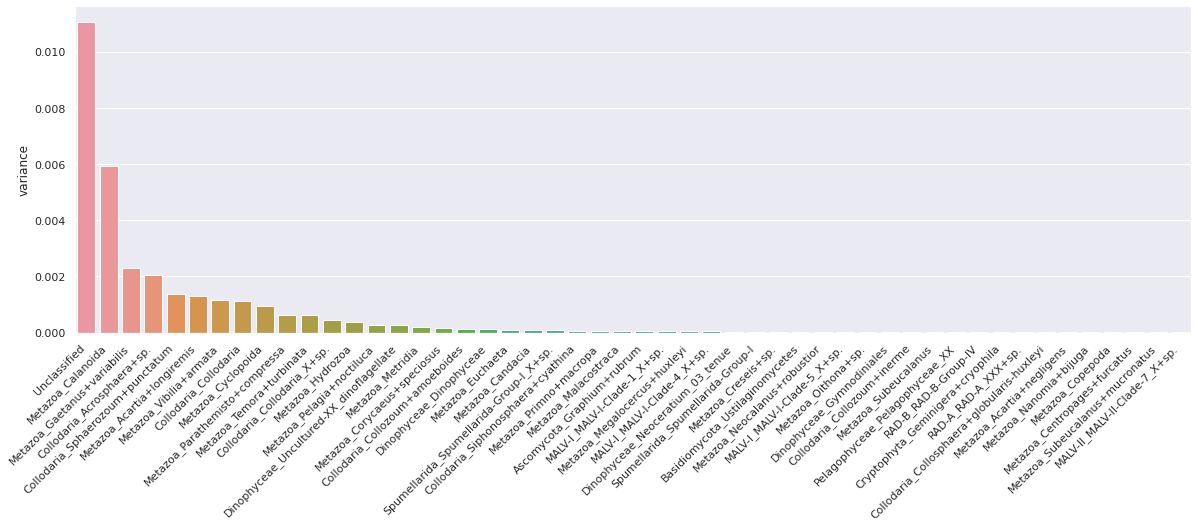

In [493]:
# visualization as barplot
plt.figure(figsize=(20, 6))
varplot = sns.barplot(x=var_sort.iloc[range(50)].index, y="variance", data=var_sort.iloc[range(50)])
plt.legend([],[], frameon=False) # hide legend
varplot.set_xticklabels(varplot.get_xticklabels(), rotation=45, horizontalalignment='right') # rotate x axis labels
# show
plt.show()

In [494]:
# explore species with highest variance
# Metazoa_Calanoida
euk_norm['Metazoa_Calanoida'].values

array([0.00215354, 0.00903325, 0.02945515, 0.01996204, 0.13734367,
       0.0467181 , 0.09208545, 0.07473609, 0.03683328, 0.03830367,
       0.06496426, 0.07316376, 0.04565783, 0.10993605, 0.25611121,
       0.08978497, 0.10037635, 0.18121928, 0.13266409, 0.21136909,
       0.03631119, 0.04847676, 0.09947679, 0.06755009, 0.18652583,
       0.04262558, 0.08873873, 0.04666326, 0.11410924, 0.1128577 ,
       0.07176279, 0.08640995, 0.09157838, 0.11120048, 0.13773771,
       0.02551123, 0.18680232, 0.00536976, 0.06442582, 0.08315995,
       0.0295449 , 0.18681807, 0.1200136 , 0.13472919, 0.07900858,
       0.16404617, 0.18842469, 0.08891292, 0.10309038, 0.04779511,
       0.07699176, 0.10517442, 0.08543871, 0.41131902, 0.29833726,
       0.12416718, 0.08329872, 0.06766665, 0.11029684, 0.16672026,
       0.12453022, 0.33815616, 0.18299789, 0.20049116, 0.19626283,
       0.15044464, 0.12247854])

In [495]:
# get names of species with highest variance in abundance between locations
subset = var_sort.iloc[range(30)].index

# subset euk to species with highest variance between locations
euk_var_z = euk_scaled[subset]

# reset index
euk_var_z = euk_var_z.reset_index()

# show
euk_var_z

,Sample,Unclassified,Metazoa_Calanoida,Metazoa_Gaetanus+variabilis,Collodaria_Acrosphaera+sp.,Collodaria_Sphaerozoum+punctatum,Metazoa_Acartia+longiremis,Metazoa_Vibilia+armata,Collodaria_Collodaria,Metazoa_Cyclopoida,...,Metazoa_Candacia,Spumellarida_Spumellarida-Group-I_X+sp.,Collodaria_Siphonosphaera+cyathina,Metazoa_Primno+macropa,Metazoa_Malacostraca,Ascomycota_Graphium+rubrum,MALV-I_MALV-I-Clade-1_X+sp.,Metazoa_Megalocercus+huxleyi,MALV-I_MALV-I-Clade-4_X+sp.,Dinophyceae_Neoceratium_03_tenue
0,S4DCM,1.922690,-1.427197,0.369934,-0.476738,-0.443093,-0.640736,-0.123197,-0.573119,-0.796250,...,-0.245405,-0.437588,-0.287184,-0.216842,-0.550461,-0.191893,0.699676,-0.287826,0.567900,-0.819416
1,S4SUR,-1.756244,-1.337106,4.108100,-0.476261,-0.424101,-0.638397,-0.123197,3.179238,1.160501,...,-0.254241,0.491267,-0.286550,-0.216521,-0.547976,-0.194976,-0.216463,-0.280413,-0.847589,-0.575737
2,S7DCM,-0.258269,-1.069675,-0.194758,-0.479098,-0.444595,-0.647930,-0.123197,-0.578288,-0.092401,...,-0.216605,-0.464469,-0.287767,-0.217179,-0.531715,-0.196625,-0.256974,-0.234837,-0.478831,1.687379
3,S7SUR,-0.728975,-1.193990,1.122127,-0.478856,-0.439386,-0.647923,-0.123197,-0.161797,-0.218310,...,-0.257541,-0.463579,-0.287767,-0.143255,-0.521514,-0.196625,-0.629795,-0.285707,-1.129439,0.722267
4,S9DCM,0.007928,0.343156,0.715883,-0.478468,-0.444442,-0.644126,-0.123197,-0.587029,-0.821107,...,-0.257260,4.069640,-0.287589,0.146840,-0.278339,-0.196573,-0.398999,-0.156392,0.882389,-0.819455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,S123SUR,0.264630,0.941011,-0.536976,-0.289009,1.725204,0.102301,-0.123197,1.057357,-0.596602,...,-0.127318,-0.469704,-0.280370,-0.216719,0.609297,-0.195245,-0.677524,0.779964,-0.041032,-0.098202
63,S124DCM,0.056704,1.170091,-0.682250,-0.358689,-0.379024,-0.519669,-0.123189,-0.177560,-0.746622,...,-0.224859,-0.288714,-0.236026,-0.181777,0.714342,0.187172,1.340593,-0.277273,1.804678,-0.775123
64,S124SUR,-0.663231,1.114719,-0.589645,0.938970,-0.206014,-0.362047,-0.123192,1.305439,-0.671796,...,-0.198319,-0.471107,0.660896,-0.211325,0.227508,-0.192573,0.565073,-0.277966,1.315882,-0.247366
65,S125DCM,0.653365,0.514717,-0.659883,0.108555,0.304038,-0.473145,-0.123197,0.330895,-0.352437,...,-0.245743,2.053339,0.658282,-0.217289,3.896903,-0.068876,-0.850790,-0.288372,-1.394293,-0.730419


In [496]:
# read environmental data
url = 'https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/SI4_environmental_data.tsv?raw=true'
df = pd.read_csv(url, on_bad_lines='skip', sep='\t', header = 0)
# show
df

,Sample,Latitude,Longitude,Salinity,NO2 (umol/L),PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day)
0,S4DCM,36.573000,-6.538667,36.556443,NaN,NaN,NaN,0.880307,16.246331,NaN,NaN,NaN
1,S4SUR,36.553333,-6.566833,36.632400,NaN,NaN,NaN,0.078000,20.525100,NaN,NaN,686.0860
2,S7DCM,37.038683,1.949833,NaN,0.00,0.01,0.03,0.553274,17.367460,NaN,NaN,354.2245
3,S7SUR,37.021067,1.949467,37.491100,0.00,0.06,0.03,0.081200,23.825750,NaN,NaN,354.2245
4,S9DCM,39.073400,5.859833,37.823200,0.02,0.02,0.08,0.434367,16.151933,NaN,NaN,205.1220
...,...,...,...,...,...,...,...,...,...,...,...,...
99,S150SUR,35.907050,-37.260950,36.312300,0.04,0.01,0.17,0.196921,17.583075,228.375583,0.412354,573.6970
100,S151DCM,36.194437,-28.882892,36.162887,0.01,0.01,0.05,0.247378,16.751066,228.545150,1.379385,466.3220
101,S151SUR,36.155767,-29.008900,36.237750,0.02,0.01,0.02,0.040347,17.260108,232.053333,4.591674,444.0935
102,S152DCM,43.739633,-16.882796,35.989700,0.32,0.17,2.26,0.268290,14.282106,240.842650,4.113166,442.7360


In [497]:
# center and scale data (account for some species being overall higher or lower abundant)
sc = StandardScaler()

# make Eukaryotic lineages as row name
df_scaled = df.set_index(df['Sample'])

# rm Sample col
df_scaled_format = df_scaled.drop(['Latitude', 'Longitude','Sample'], axis = 1)

# apply scaler
df_scaled = sc.fit_transform(df_scaled_format.to_numpy())

# convert to pandas data frame
df_scaled = pd.DataFrame(df_scaled, columns=[df_scaled_format.columns])

# show first n rows
df_scaled.head()

,Salinity,NO2 (umol/L),PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day)
0,0.364113,NaN,NaN,NaN,2.759744,-1.391447,NaN,NaN,NaN
1,0.410703,NaN,NaN,NaN,-0.717905,-0.413132,NaN,NaN,0.300657
2,NaN,-0.562335,-0.797969,-0.483448,1.342199,-1.135107,NaN,NaN,-0.201176
3,0.937404,-0.562335,-0.660659,-0.483448,-0.704034,0.341542,NaN,NaN,-0.201176
4,1.141104,-0.475984,-0.770507,-0.472310,0.826790,-1.413030,NaN,NaN,-0.426645


In [498]:
# re-add 'Latitude', 'Longitude','Sample'
df_scaled[['Latitude', 'Longitude','Sample']] = df[['Latitude', 'Longitude','Sample']]

df_scaled

,Salinity,NO2 (umol/L),PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day),Latitude,Longitude,Sample
0,0.364113,NaN,NaN,NaN,2.759744,-1.391447,NaN,NaN,NaN,36.573000,-6.538667,S4DCM
1,0.410703,NaN,NaN,NaN,-0.717905,-0.413132,NaN,NaN,0.300657,36.553333,-6.566833,S4SUR
2,NaN,-0.562335,-0.797969,-0.483448,1.342199,-1.135107,NaN,NaN,-0.201176,37.038683,1.949833,S7DCM
3,0.937404,-0.562335,-0.660659,-0.483448,-0.704034,0.341542,NaN,NaN,-0.201176,37.021067,1.949467,S7SUR
4,1.141104,-0.475984,-0.770507,-0.472310,0.826790,-1.413030,NaN,NaN,-0.426645,39.073400,5.859833,S9DCM
...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.214363,-0.389634,-0.797969,-0.452261,-0.202434,-1.085808,0.958752,-0.593838,0.130705,35.907050,-37.260950,S150SUR
100,0.122717,-0.519159,-0.797969,-0.478993,0.016275,-1.276042,0.964504,-0.270262,-0.031665,36.194437,-28.882892,S151DCM
101,0.168636,-0.475984,-0.797969,-0.485676,-0.881114,-1.159653,1.083508,0.804594,-0.065278,36.155767,-29.008900,S151SUR
102,0.016490,0.819271,-0.358576,0.013313,0.106919,-1.840555,1.381657,0.644481,-0.067331,43.739633,-16.882796,S152DCM


In [499]:
euk_var_z

,Sample,Unclassified,Metazoa_Calanoida,Metazoa_Gaetanus+variabilis,Collodaria_Acrosphaera+sp.,Collodaria_Sphaerozoum+punctatum,Metazoa_Acartia+longiremis,Metazoa_Vibilia+armata,Collodaria_Collodaria,Metazoa_Cyclopoida,...,Metazoa_Candacia,Spumellarida_Spumellarida-Group-I_X+sp.,Collodaria_Siphonosphaera+cyathina,Metazoa_Primno+macropa,Metazoa_Malacostraca,Ascomycota_Graphium+rubrum,MALV-I_MALV-I-Clade-1_X+sp.,Metazoa_Megalocercus+huxleyi,MALV-I_MALV-I-Clade-4_X+sp.,Dinophyceae_Neoceratium_03_tenue
0,S4DCM,1.922690,-1.427197,0.369934,-0.476738,-0.443093,-0.640736,-0.123197,-0.573119,-0.796250,...,-0.245405,-0.437588,-0.287184,-0.216842,-0.550461,-0.191893,0.699676,-0.287826,0.567900,-0.819416
1,S4SUR,-1.756244,-1.337106,4.108100,-0.476261,-0.424101,-0.638397,-0.123197,3.179238,1.160501,...,-0.254241,0.491267,-0.286550,-0.216521,-0.547976,-0.194976,-0.216463,-0.280413,-0.847589,-0.575737
2,S7DCM,-0.258269,-1.069675,-0.194758,-0.479098,-0.444595,-0.647930,-0.123197,-0.578288,-0.092401,...,-0.216605,-0.464469,-0.287767,-0.217179,-0.531715,-0.196625,-0.256974,-0.234837,-0.478831,1.687379
3,S7SUR,-0.728975,-1.193990,1.122127,-0.478856,-0.439386,-0.647923,-0.123197,-0.161797,-0.218310,...,-0.257541,-0.463579,-0.287767,-0.143255,-0.521514,-0.196625,-0.629795,-0.285707,-1.129439,0.722267
4,S9DCM,0.007928,0.343156,0.715883,-0.478468,-0.444442,-0.644126,-0.123197,-0.587029,-0.821107,...,-0.257260,4.069640,-0.287589,0.146840,-0.278339,-0.196573,-0.398999,-0.156392,0.882389,-0.819455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,S123SUR,0.264630,0.941011,-0.536976,-0.289009,1.725204,0.102301,-0.123197,1.057357,-0.596602,...,-0.127318,-0.469704,-0.280370,-0.216719,0.609297,-0.195245,-0.677524,0.779964,-0.041032,-0.098202
63,S124DCM,0.056704,1.170091,-0.682250,-0.358689,-0.379024,-0.519669,-0.123189,-0.177560,-0.746622,...,-0.224859,-0.288714,-0.236026,-0.181777,0.714342,0.187172,1.340593,-0.277273,1.804678,-0.775123
64,S124SUR,-0.663231,1.114719,-0.589645,0.938970,-0.206014,-0.362047,-0.123192,1.305439,-0.671796,...,-0.198319,-0.471107,0.660896,-0.211325,0.227508,-0.192573,0.565073,-0.277966,1.315882,-0.247366
65,S125DCM,0.653365,0.514717,-0.659883,0.108555,0.304038,-0.473145,-0.123197,0.330895,-0.352437,...,-0.245743,2.053339,0.658282,-0.217289,3.896903,-0.068876,-0.850790,-0.288372,-1.394293,-0.730419


In [500]:
# Join environmental data to eukaryotes with high variance in abundance between locations
df_c = euk_var_z.join(df_scaled, how='left', lsuffix='_left', rsuffix='_right')

df_c

,Sample_left,Unclassified,Metazoa_Calanoida,Metazoa_Gaetanus+variabilis,Collodaria_Acrosphaera+sp.,Collodaria_Sphaerozoum+punctatum,Metazoa_Acartia+longiremis,Metazoa_Vibilia+armata,Collodaria_Collodaria,Metazoa_Cyclopoida,...,PO4 (umol/L),NO2NO3 (umol/L),Mean Chloro HPLC adjusted (mg Chl/m3),Mean Temperature deg C,Mean Oxygen adjusted (umol/Kg),Mean Flux at 150m,NPP 8d VGPM (mgC/m2/day),Latitude,Longitude,Sample_right
0,S4DCM,1.922690,-1.427197,0.369934,-0.476738,-0.443093,-0.640736,-0.123197,-0.573119,-0.796250,...,NaN,NaN,2.759744,-1.391447,NaN,NaN,NaN,36.573000,-6.538667,S4DCM
1,S4SUR,-1.756244,-1.337106,4.108100,-0.476261,-0.424101,-0.638397,-0.123197,3.179238,1.160501,...,NaN,NaN,-0.717905,-0.413132,NaN,NaN,0.300657,36.553333,-6.566833,S4SUR
2,S7DCM,-0.258269,-1.069675,-0.194758,-0.479098,-0.444595,-0.647930,-0.123197,-0.578288,-0.092401,...,-0.797969,-0.483448,1.342199,-1.135107,NaN,NaN,-0.201176,37.038683,1.949833,S7DCM
3,S7SUR,-0.728975,-1.193990,1.122127,-0.478856,-0.439386,-0.647923,-0.123197,-0.161797,-0.218310,...,-0.660659,-0.483448,-0.704034,0.341542,NaN,NaN,-0.201176,37.021067,1.949467,S7SUR
4,S9DCM,0.007928,0.343156,0.715883,-0.478468,-0.444442,-0.644126,-0.123197,-0.587029,-0.821107,...,-0.770507,-0.472310,0.826790,-1.413030,NaN,NaN,-0.426645,39.073400,5.859833,S9DCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,S123SUR,0.264630,0.941011,-0.536976,-0.289009,1.725204,0.102301,-0.123197,1.057357,-0.596602,...,4.282511,4.945286,2.103630,-0.632366,-3.263123,0.283739,0.019693,-5.269667,-85.228733,S102DCM
63,S124DCM,0.056704,1.170091,-0.682250,-0.358689,-0.379024,-0.519669,-0.123189,-0.177560,-0.746622,...,1.920775,2.316683,-0.023404,0.597019,0.199479,0.921240,0.019693,-5.252333,-85.160983,S102SUR
64,S124SUR,-0.663231,1.114719,-0.589645,0.938970,-0.206014,-0.362047,-0.123192,1.305439,-0.671796,...,0.547672,0.534579,2.140209,0.960318,0.102295,-0.431001,-0.162319,2.076667,-84.520283,S109DCM
65,S125DCM,0.653365,0.514717,-0.659883,0.108555,0.304038,-0.473145,-0.123197,0.330895,-0.352437,...,-0.083955,-0.289644,0.164915,1.208516,-0.050076,-0.085878,-0.192696,1.992817,-84.576617,S109SUR


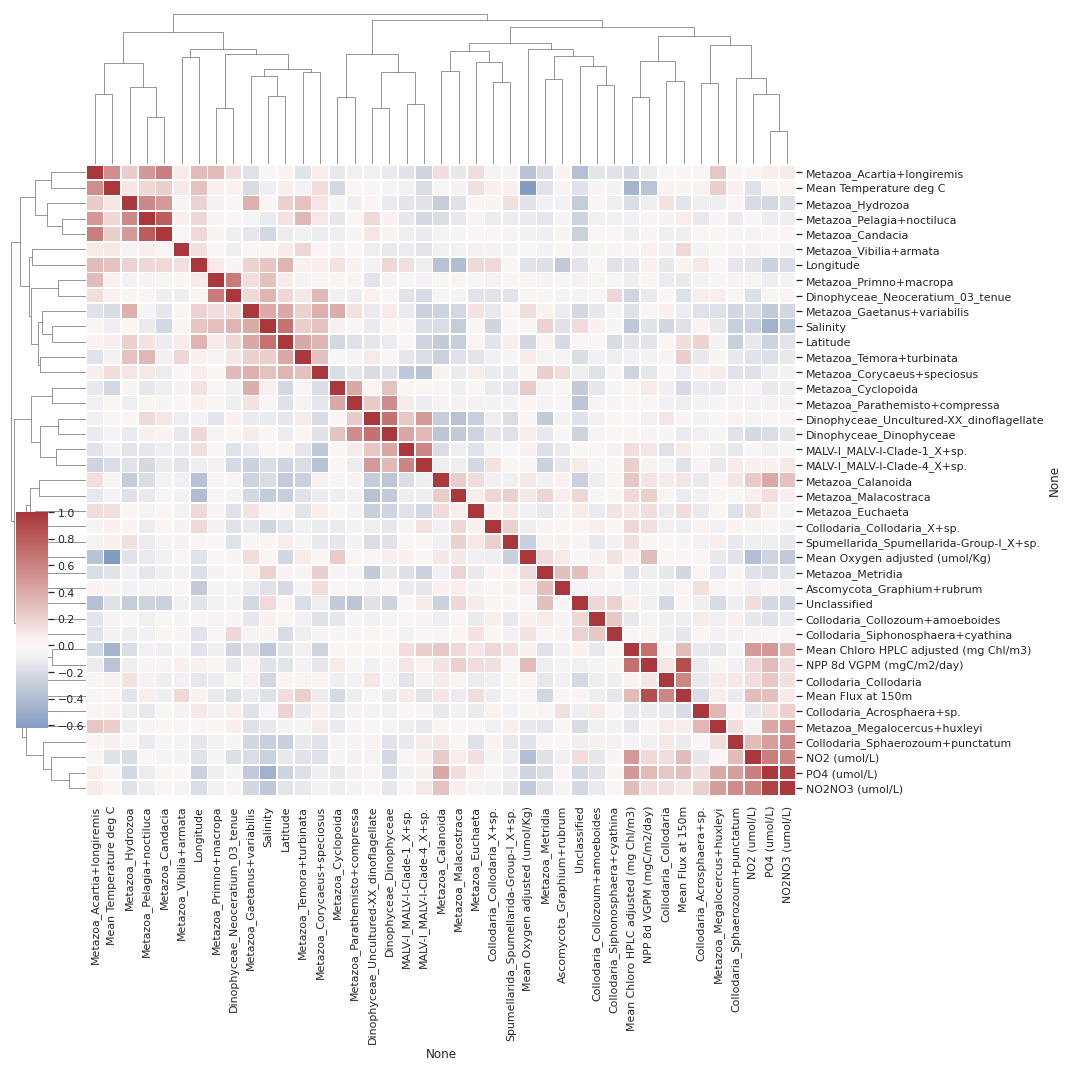

In [502]:
sns.clustermap(df_c.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(15, 15))

In [535]:
# geographic plot
subset = df_c[['Longitude', 'Latitude', 'Metazoa_Gaetanus+variabilis']].values
px.scatter_geo(data_frame = subset, lat= 1, lon = 0, color = 2)

In [536]:
subset = df_c[['Longitude', 'Latitude', 'Salinity']].values
px.scatter_geo(data_frame = subset, lat= 1, lon = 0, color = 2)